In [1]:
from UTILITY_quickstart import *

from scipy.optimize import minimize
from scipy.optimize import differential_evolution
import numpy as np
from UTILITY_setLattice import setLattice, getBendkG, getQuadkG, getSextkG, setBendkG, setQuadkG, setSextkG, setXOffset, setYOffset


In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/defaults.yml")

tao = initializeTao(
    loadDefaultLatticeTF = False
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Not using setLattice(). Golden lattice
WARNING! No beam file is specified!
Number of macro particles defined by input file
Beam created, written to /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/beams/activeBeamFile.h5, and reinit to tao


## Golden lattice

In [ ]:
setLattice(tao, **importedDefaultSettings)
launchTwissCorrection(tao)


tao.ele_twiss( "PENT" )

No evalElement provided. Assuming golden lattice PR10571
Optimization Results:
Optimal Parameters: [0.13000809 0.88704422 0.36260991 1.98836191]
Objective Function Value at Optimal Parameters: 4.614255455486702e-09
Number of Iterations: 94
Converged: True


{'mode_flip': False,
 'beta_a': 0.486177090401142,
 'alpha_a': 0.058525946605526,
 'gamma_a': 2.06390902870012,
 'phi_a': 73.0014767122894,
 'eta_a': -5.72725825090713e-05,
 'etap_a': -0.00026147028269745,
 'beta_b': 0.502501987046633,
 'alpha_b': -0.0164733114905142,
 'gamma_b': 1.99058191962659,
 'phi_b': 60.3933206246692,
 'eta_b': 4.41192710854735e-18,
 'etap_b': -9.96024680328529e-19,
 'eta_x': -5.72725825090713e-05,
 'etap_x': -0.00026147028269745,
 'eta_y': 4.41771593876296e-18,
 'etap_y': -9.60942192227245e-19}

In [4]:
tao.ele_twiss( "XTCAVF" )

{'mode_flip': False,
 'beta_a': 73.8098224491436,
 'alpha_a': -1.56295924427843,
 'gamma_a': 0.0466447619711807,
 'phi_a': 71.4987155771988,
 'eta_a': 0.00155591354637591,
 'etap_a': 2.19279018286621e-05,
 'beta_b': 9.93640303249997,
 'alpha_b': -2.9450941308753,
 'gamma_b': 0.973549423073505,
 'phi_b': 58.7903487719284,
 'eta_b': 4.14473564473098e-18,
 'etap_b': 1.79624901616747e-18,
 'eta_x': 0.00155591354637591,
 'etap_x': 2.19279018286621e-05,
 'eta_y': 4.06597955702282e-18,
 'etap_y': 1.77524302479569e-18}

In [5]:
getMatrix(tao, "XTCAVF", "DTOTR", print = True );

0.817169,-23.679248,-0.000000,0.000000,0.000000,0.000000
0.111299,-2.001385,-0.000000,0.000000,0.000000,0.000000
-0.000000,-0.000000,0.415611,-4.277341,0.000000,0.055920
-0.000000,-0.000000,0.260609,-0.276014,0.000000,0.006000
0.000000,-0.000000,0.012080,0.010229,1.000000,-0.000006
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [6]:
tao.ele_twiss( "DTOTR" )["phi_a"] - tao.ele_twiss( "XTCAVF" )["phi_a"]

5.489829972183102

## S20 configurator optics

In [7]:
#S20 configurator TCAV optics: https://docs.google.com/presentation/d/1pEDyfRYzVhJpeqzpDUfJOKxTxE6_achOUj4SHY-MoQQ/edit#slide=id.g2f39098462d_0_5

setQuadkG(tao, "Q5FF", -192)
setQuadkG(tao, "Q4FF", -162)
setQuadkG(tao, "Q3FF", 105)
setQuadkG(tao, "Q2FF", 120)
setQuadkG(tao, "Q1FF", -209)
setQuadkG(tao, "Q0FF", 120)
setQuadkG(tao, "Q0D", -139)
setQuadkG(tao, "Q1D", 225)
setQuadkG(tao, "Q2D", -139)

In [8]:
tao.ele_twiss( "XTCAVF" )

{'mode_flip': False,
 'beta_a': 638.208388809086,
 'alpha_a': -56.9613260008028,
 'gamma_a': 5.08547477075018,
 'phi_a': 71.3876402814513,
 'eta_a': 0.00481210539519904,
 'etap_a': 0.000426559986399414,
 'beta_b': 312.139274527726,
 'alpha_b': -55.5310723873378,
 'gamma_b': 9.88244752332102,
 'phi_b': 59.316416263713,
 'eta_b': 2.10873155955538e-17,
 'etap_b': 5.38554570284391e-18,
 'eta_x': 0.00481210539519904,
 'etap_x': 0.000426559986399414,
 'eta_y': 2.07709379235766e-17,
 'etap_y': 5.33033126148102e-18}

In [9]:
tao.ele_twiss( "DTOTR" )

{'mode_flip': False,
 'beta_a': 16.7292039292577,
 'alpha_a': 0.520447195991001,
 'gamma_a': 0.0759668714177297,
 'phi_a': 75.0405565076265,
 'eta_a': -0.000531319027823047,
 'etap_a': 5.50988651658197e-05,
 'beta_b': 0.274518527168326,
 'alpha_b': 0.622791978263791,
 'gamma_b': 5.05565093367533,
 'phi_b': 63.4574081946601,
 'eta_b': 0.0559202303727424,
 'etap_b': 0.00600001800006479,
 'eta_x': -0.000531319027823023,
 'etap_x': 5.50988651658214e-05,
 'eta_y': 0.0559202303727424,
 'etap_y': 0.00600001800006479}

In [10]:
tao.ele_twiss( "DTOTR" )["phi_a"] - tao.ele_twiss( "XTCAVF" )["phi_a"]

3.6529162261752077

In [11]:
getMatrix(tao, "XTCAVF", "DTOTR", print = True );

4.371542,-50.561794,-0.000000,0.000000,0.000000,0.000000
0.349494,-3.813543,-0.000000,0.000000,0.000000,0.000000
-0.000000,0.000000,1.369183,-7.786308,0.000000,0.055920
0.000000,-0.000000,0.228927,-0.571506,0.000000,0.006000
0.000000,-0.000000,0.004587,0.014759,1.000000,-0.000006
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## Maximize beta at XTCAVF

In [12]:
def objective( params, tao ):
    Q5FFkG, Q4FFkG, Q3FFkG = params
    
    try:
        #Prevent recalculation until changes are made
        tao.cmd("set global lattice_calc_on = F")
        
        setQuadkG(tao, "Q5FF", Q5FFkG)
        setQuadkG(tao, "Q4FF", Q4FFkG)
        setQuadkG(tao, "Q3FF", Q3FFkG)
        
        #Reenable lattice calculations
        tao.cmd("set global lattice_calc_on = T")
    
    except: #If Bmad doesn't like the proposed solution, don't crash, give a bad number
        return 1e20

    resultTwiss = tao.twiss_at_s(ele = "XTCAVF")
    resultBetaX = resultTwiss["beta_a"]
    resultAlphaX = resultTwiss["alpha_a"]

    return 1/resultBetaX

    #Optionally push alpha to zero too
    #return -1*resultBetaX + 1e3 * abs(resultAlphaX)




quadNameList = ["Q5FF", "Q4FF", "Q3FF"] 
initialGuess = [getQuadkG(tao, name) for name in quadNameList]

#For now, just hardcoding bounds... could generalize if required
#From "bounds.yml" as of 2025-01-10-11-11-35
# Q5FFkGBounds: (-256, 0)  #BCON = -70
# Q4FFkGBounds: (-446, 0)  #BCON = -71
# Q3FFkGBounds: (0, 457)   #BCON = 106
# Q2FFkGBounds: (0, 167)   #BCON = 112
# Q1FFkGBounds: (-257, 0)  #BCON = -225
# Q0FFkGBounds: (0, 167)   #BCON = 112

bounds = [(-256,0), (-446,0), (0,457)]


# Perform optimization using Nelder-Mead
# result = minimize(
#     finalFocusSolverObjective, 
#     initialGuess, 
#     method='Nelder-Mead',
#     bounds = bounds,
#     args = (tao, ele, s_offset, targetBetaX, targetAlphaX, targetBetaY, targetAlphaY)
# )

result = differential_evolution(
    objective, 
    bounds = bounds,
    args = (tao, ),
    #maxiter = 50,
    polish = False,
    disp = True
)


print("Optimization Results:")
print(f"Optimal Parameters: {result.x}")
print(f"Objective Function Value at Optimal Parameters: {result.fun}")
print(f"Number of Iterations: {result.nit}")
print(f"Converged: {result.success}")



differential_evolution step 1: f(x)= 0.0002924613971503627
differential_evolution step 2: f(x)= 0.00013563613389901488
differential_evolution step 3: f(x)= 0.00013563613389901488
differential_evolution step 4: f(x)= 0.0001017807738487611
differential_evolution step 5: f(x)= 0.0001017807738487611
differential_evolution step 6: f(x)= 0.0001017807738487611
differential_evolution step 7: f(x)= 8.417402062681792e-05
differential_evolution step 8: f(x)= 8.417402062681792e-05
differential_evolution step 9: f(x)= 8.172710692516009e-05
differential_evolution step 10: f(x)= 8.027630509979054e-05
differential_evolution step 11: f(x)= 8.027630509979054e-05
differential_evolution step 12: f(x)= 8.027630509979054e-05
differential_evolution step 13: f(x)= 7.792567681498292e-05
differential_evolution step 14: f(x)= 7.731595187897975e-05
differential_evolution step 15: f(x)= 7.65847221675629e-05
differential_evolution step 16: f(x)= 7.65847221675629e-05
differential_evolution step 17: f(x)= 7.658472216

In [13]:
objective( result.x, tao )

7.539616765375342e-05

In [14]:
tao.ele_twiss( "XTCAVF" )

{'mode_flip': False,
 'beta_a': 13263.2736002228,
 'alpha_a': -2113.65441390989,
 'gamma_a': 336.835091855883,
 'phi_a': 71.359782880056,
 'eta_a': 0.0221660060736571,
 'etap_a': 0.00353181037132981,
 'beta_b': 52.3752386009107,
 'alpha_b': -6.42673566304176,
 'gamma_b': 0.807689519182012,
 'phi_b': 59.5531252872408,
 'eta_b': 2.22211974769744e-17,
 'etap_b': 4.28250200318409e-18,
 'eta_x': 0.0221660060736571,
 'etap_x': 0.00353181037132981,
 'eta_y': 2.21273170612497e-17,
 'etap_y': 4.2741034695219e-18}

In [15]:
getMatrix(tao, "XTCAVF", "DTOTR", print = True );

4.371542,-50.561794,0.000000,-0.000000,0.000000,0.000000
0.349494,-3.813543,0.000000,-0.000000,0.000000,0.000000
-0.000000,0.000000,1.369183,-7.786308,0.000000,0.055920
0.000000,-0.000000,0.228927,-0.571506,0.000000,0.006000
-0.000000,0.000000,0.004587,0.014759,1.000000,-0.000006
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [16]:
tao.ele_twiss( "DTOTR" )["phi_a"] - tao.ele_twiss( "XTCAVF" )["phi_a"]

3.142626865022592

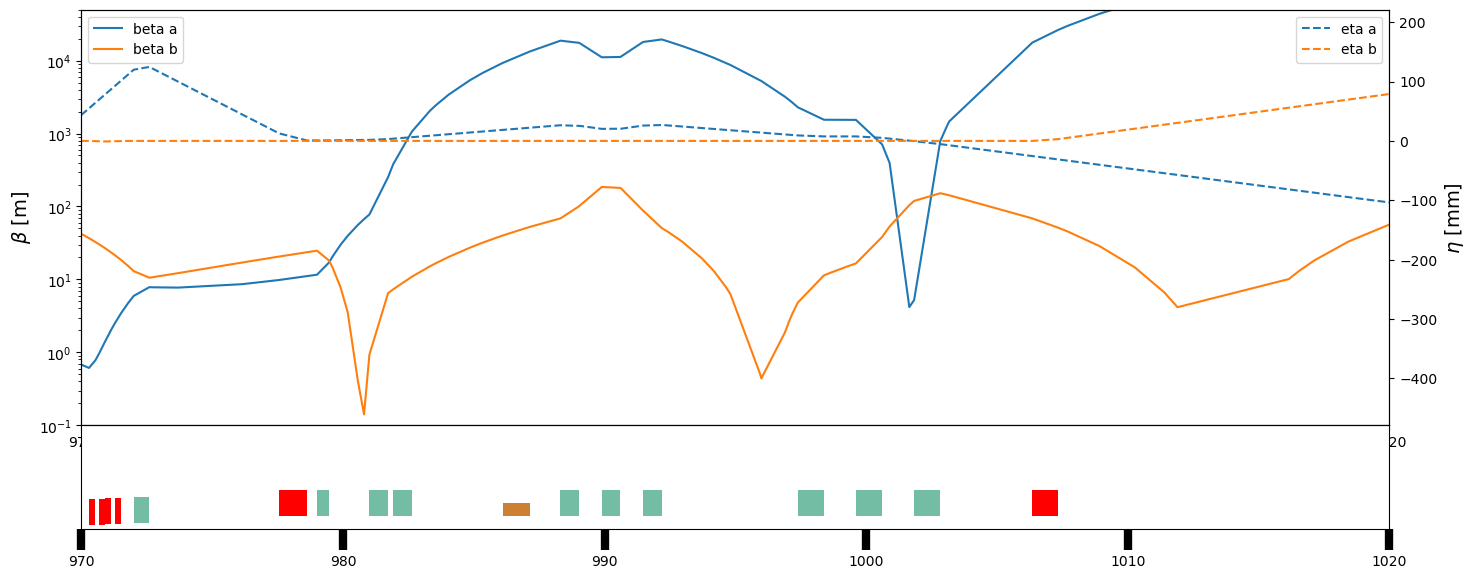

In [17]:
floorplanPlot(tao, zmin=970, zmax=1020, ymin=0.1, ymax=50000)

In [18]:
tao.twiss_at_s(ele = "XTCAVF", s_offset = 1)

{'beta_a': 17827.4175198985,
 'alpha_a': -2450.48950576577,
 'gamma_a': 336.835091855883,
 'phi_a': 71.3598479125513,
 'eta_a': 0.0256978164449876,
 'etap_a': 0.00353181037132981,
 'beta_b': 66.0363994461762,
 'alpha_b': -7.23442518222376,
 'gamma_b': 0.807689519182012,
 'phi_b': 59.5701298797782,
 'eta_b': 2.58845976050722e-17,
 'etap_b': 4.28250200318409e-18,
 'c_mat11': -5.97144823532226e-17,
 'c_mat12': 4.33107285940643e-16,
 'c_mat21': -9.89347205929519e-18,
 'c_mat22': 7.32442829219437e-17,
 'gamma_c': 1.0}

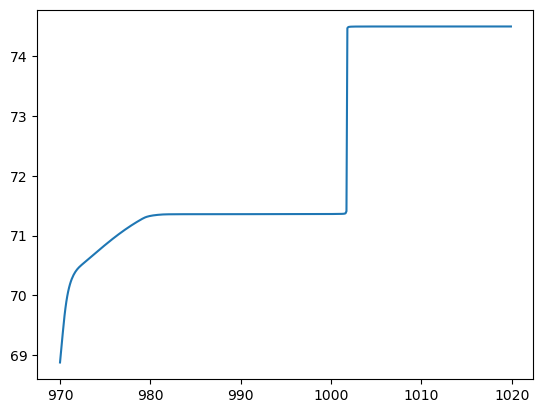

In [19]:
#sVals = np.arange(1, 30, 0.1)
#phiVals = [tao.twiss_at_s(ele = "XTCAVF", s_offset = s)["phi_a"] for s in sVals]
sVals = np.arange(970, 1020, 0.1)
phiVals = [tao.twiss_at_s(ele = "BEGINNING", s_offset = s)["phi_a"] for s in sVals]

plt.plot(sVals, phiVals)

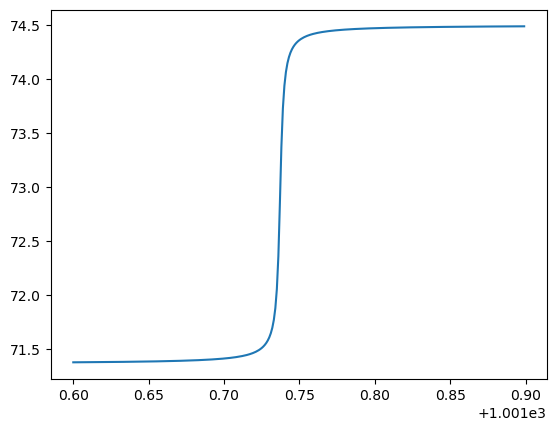

In [20]:
sVals = np.arange(1001.6, 1001.9, 0.001)
phiVals = [tao.twiss_at_s(ele = "BEGINNING", s_offset = s)["phi_a"] for s in sVals]

plt.plot(sVals, phiVals)

## Now getting 90 deg phase advance

In [25]:
def objective( params, tao ):
    Q2FFkG, Q1FFkG, Q0FFkG, Q0DkG, Q1DkG, Q2DkG = params
    
    try:
        #Prevent recalculation until changes are made
        tao.cmd("set global lattice_calc_on = F")
        
        setQuadkG(tao, "Q2FF", Q2FFkG)
        setQuadkG(tao, "Q1FF", Q1FFkG)
        setQuadkG(tao, "Q0FF", Q0FFkG)
        setQuadkG(tao, "Q0D", Q0DkG)
        setQuadkG(tao, "Q1D", Q1DkG)
        setQuadkG(tao, "Q2D", Q2DkG)
        
        #Reenable lattice calculations
        tao.cmd("set global lattice_calc_on = T")
    
    except: #If Bmad doesn't like the proposed solution, don't crash, give a bad number
        return 1e20

    phaseAdvance = tao.ele_twiss( "DTOTR" )["phi_a"] - tao.ele_twiss( "XTCAVF" )["phi_a"]
    
    return ( phaseAdvance - 3.1415/2 ) ** 2




quadNameList = ["Q2FF", "Q1FF", "Q0FF", "Q0D", "Q1D", "Q2D"] 
initialGuess = [getQuadkG(tao, name) for name in quadNameList]

#For now, just hardcoding bounds... could generalize if required
#From "bounds.yml" as of 2025-01-10-11-11-35
# Q5FFkGBounds: (-256, 0)  #BCON = -70
# Q4FFkGBounds: (-446, 0)  #BCON = -71
# Q3FFkGBounds: (0, 457)   #BCON = 106
# Q2FFkGBounds: (0, 167)   #BCON = 112
# Q1FFkGBounds: (-257, 0)  #BCON = -225
# Q0FFkGBounds: (0, 167)   #BCON = 112

bounds = [(0,167), (-257,0), (0,167), (-239,0), (0,386), (-223,0)]


# Perform optimization using Nelder-Mead
result = minimize(
    objective, 
    initialGuess, 
    method='Nelder-Mead',
    bounds = bounds,
    args = (tao, )
)

# result = differential_evolution(
#     objective, 
#     bounds = bounds,
#     args = (tao, ),
#     maxiter = 100,
#     polish = False,
#     disp = True
# )


print("Optimization Results:")
print(f"Optimal Parameters: {result.x}")
print(f"Objective Function Value at Optimal Parameters: {result.fun}")
print(f"Number of Iterations: {result.nit}")
print(f"Converged: {result.success}")

Optimization Results:
Optimal Parameters: [ 9.52206548e+01 -3.50657848e+01  1.04511134e+01 -1.47820851e+02
  8.26009148e-02 -1.94393401e+02]
Objective Function Value at Optimal Parameters: 3.2594099213246424e-12
Number of Iterations: 141
Converged: True


In [26]:
objective( result.x, tao )

3.2594099213246424e-12

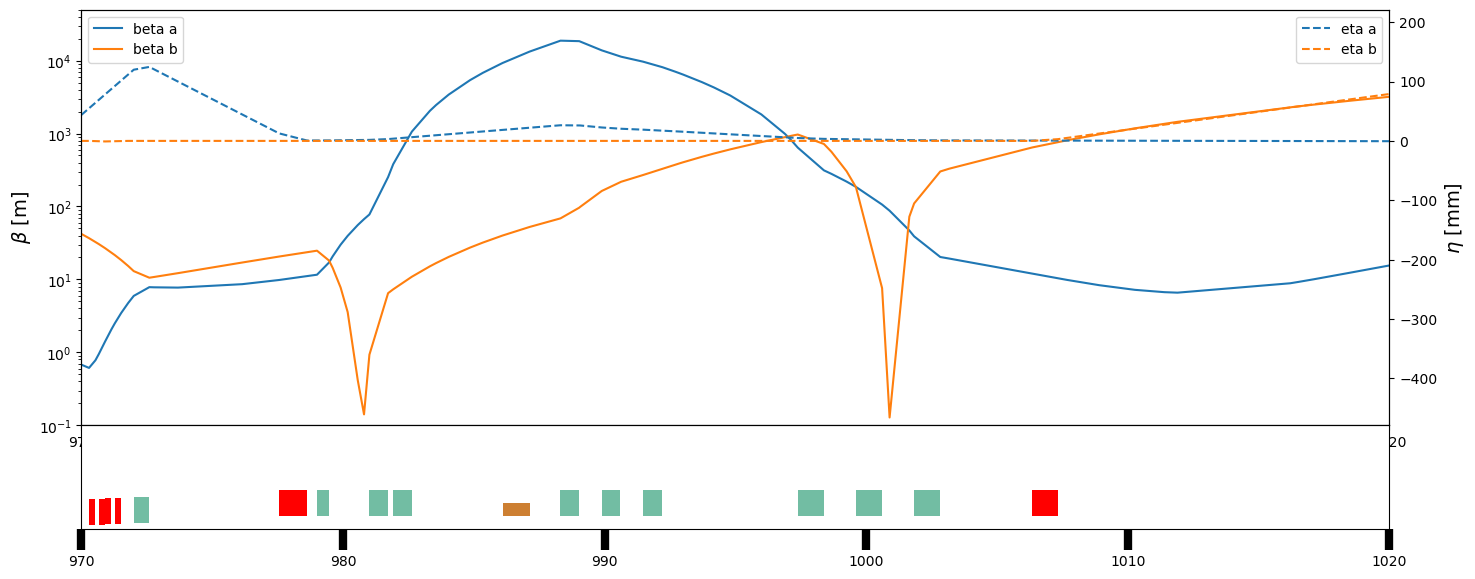

In [27]:
floorplanPlot(tao, zmin=970, zmax=1020, ymin=0.1, ymax=50000)

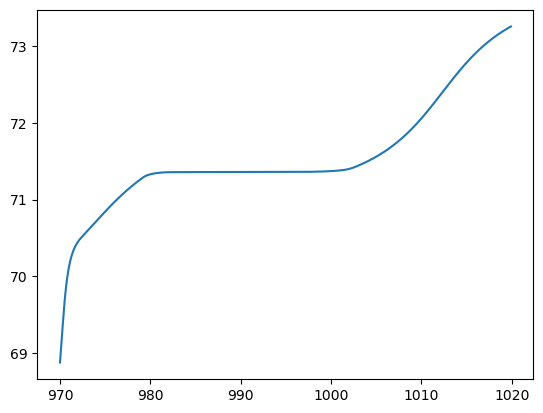

In [28]:
#sVals = np.arange(1, 30, 0.1)
#phiVals = [tao.twiss_at_s(ele = "XTCAVF", s_offset = s)["phi_a"] for s in sVals]
sVals = np.arange(970, 1020, 0.1)
phiVals = [tao.twiss_at_s(ele = "BEGINNING", s_offset = s)["phi_a"] for s in sVals]

plt.plot(sVals, phiVals)

In [29]:
tao.ele_twiss( "DTOTR" )["phi_a"] - tao.ele_twiss( "XTCAVF" )["phi_a"]

1.570751805383594